# Importing data

In [247]:
import geopandas

roads = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Spring 2024/DAT_512-Stat.-Approaches-to-Big-Data/Data/Highways_and_Roadways.csv')
roads.head()

,the_geom,OBJECTID,NYSStreetID,LeftFromAddress,LeftToAddress,RightFromAddress,RightToAddress,CompleteStreetName,HighwayNumber,Jurisdiction,FCC,ACC,SPEED,LeftPostal,RightPostal,Shape.STLength(),geometry
0,MULTILINESTRING ((-78.862643159841 42.93182848...,4760,600058501,,,,,Unnamed Street,,14,A70,6,15,14214,14214,97.321471927093,None
1,MULTILINESTRING ((-78.845214165985 42.87086246...,10718,477797294,316,370,317,369,Smith Street,,12,A31,4,35,14210,14210,90.442700644886571,None
2,MULTILINESTRING ((-78.827217182418 42.86574050...,11117,477798597,22,98,23,99,James P Coppola,,12,A30,4,35,14210,14210,205.95396010793684,None
3,MULTILINESTRING ((-78.804619308533 42.86063097...,557,477799268,248,308,,,Mineral Springs Road,,12,A35,4,35,14210,14210,162.83118260894148,None
4,MULTILINESTRING ((-78.868159186902 42.94568050...,3403,477776677,98,98,99,99,Tioga Street,,12,A41,5,25,14216,14216,4.250599957696331,None


# a.) Extract the geo data about route 33 from the Roads and Highways data set

In [248]:
route_33 = roads[roads['CompleteStreetName'] == 'State Route 33']
route_33.head()

,the_geom,OBJECTID,NYSStreetID,LeftFromAddress,LeftToAddress,RightFromAddress,RightToAddress,CompleteStreetName,HighwayNumber,Jurisdiction,FCC,ACC,SPEED,LeftPostal,RightPostal,Shape.STLength(),geometry
27,MULTILINESTRING ((-78.848574203721 42.90016242...,6881,477789711,,,,,State Route 33,33,01,A15,2,65,14211,14211,182.11687756807135,None
158,MULTILINESTRING ((-78.843302117107 42.92223743...,5670,477783413,,,,,State Route 33,33,01,A15,2,65,14214,14214,31.772199666332554,None
275,MULTILINESTRING ((-78.843512192146 42.91962145...,5700,477784190,,,,,State Route 33,33,01,A15,2,65,14214,14214,19.680589422217544,None
292,MULTILINESTRING ((-78.847195144533 42.90145946...,6212,477789175,,,,,State Route 33,33,01,A15,2,65,14211,14211,38.717733662392163,None
460,MULTILINESTRING ((-78.852768100656 42.89800350...,6859,516218529,,,,,State Route 33,33,01,A15,2,65,14211,14211,86.471009330646396,None


In [249]:
route_33['geometry'] = geopandas.GeoSeries.from_wkt(route_33['the_geom'])


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

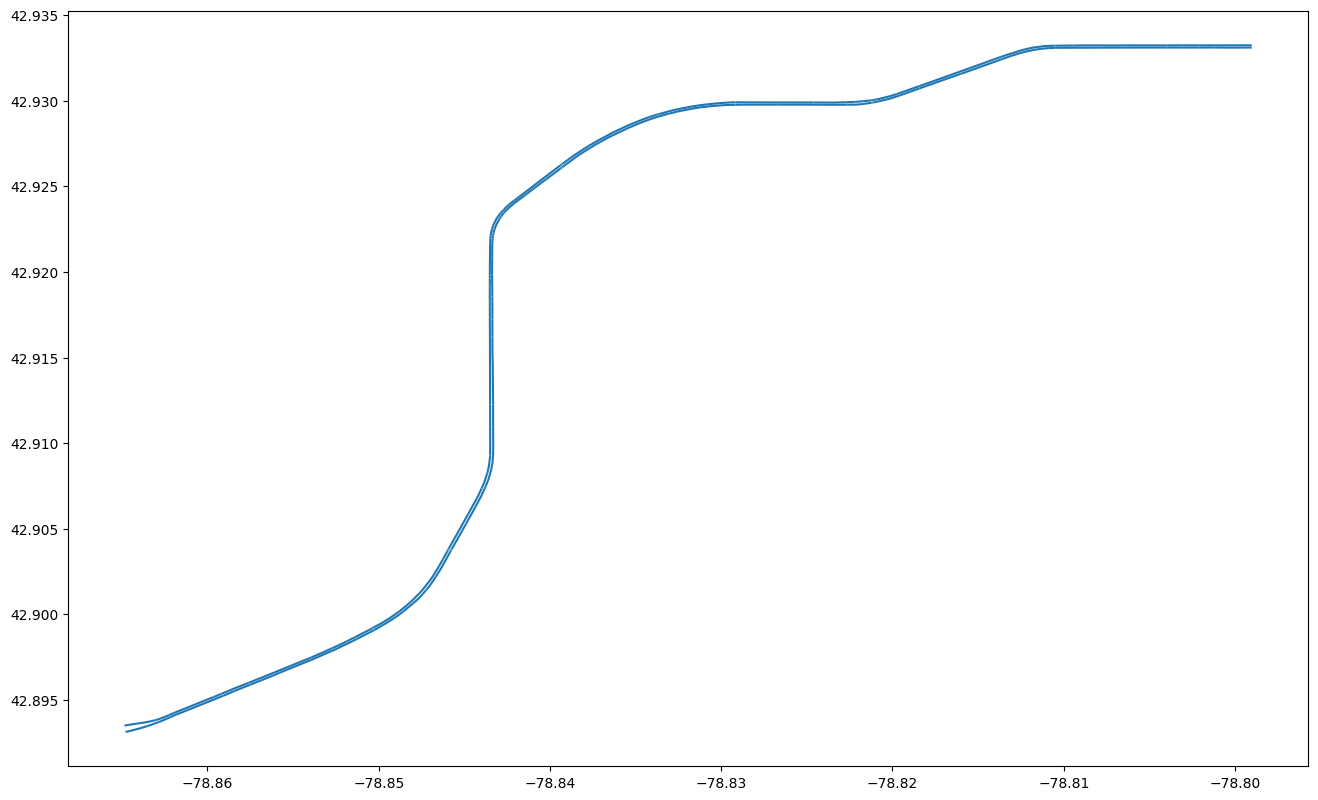

In [250]:
route_33.plot(figsize=(16,16))

# b.) Convert it to a CRS based on feet, not lat/long

In [251]:
route_33=route_33.set_crs('epsg:4326') # needs a Lat and Long CRS first
route_33.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [252]:
route_33['geometry'] = route_33['geometry'].to_crs('epsg:32117') # to covert it to meters
route_33.crs
# I know its not feet but i'll account for this being in meters in the next slides

<Projected CRS: EPSG:32117>
Name: NAD83 / New York West
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - New York - counties of Allegany; Cattaraugus; Chautauqua; Erie; Genesee; Livingston; Monroe; Niagara; Orleans; Wyoming.
- bounds: (-79.77, 41.99, -77.36, 43.64)
Coordinate Operation:
- name: SPCS83 New York West zone (meters)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# c.) Add a buffer of 300 feet  around route 33 in the data set.  You may have to increase the buffer size, but we'll see.

In [253]:
#Covering 3000 ft to meters
buffer_size = 3000* 0.3048 # Feet to meters
# Overlay the buffered geometry on the original dataset
route_33['buffered'] = route_33['geometry'].buffer(buffer_size)

In [254]:
route_33

,the_geom,OBJECTID,NYSStreetID,LeftFromAddress,LeftToAddress,RightFromAddress,RightToAddress,CompleteStreetName,HighwayNumber,Jurisdiction,FCC,ACC,SPEED,LeftPostal,RightPostal,Shape.STLength(),geometry,buffered
27,MULTILINESTRING ((-78.848574203721 42.90016242...,6881,477789711,,,,,State Route 33,33,01,A15,2,65,14211,14211,182.11687756807135,"MULTILINESTRING ((328338.367 322113.722, 32831...","POLYGON ((327681.026 322749.454, 327681.720 32..."
158,MULTILINESTRING ((-78.843302117107 42.92223743...,5670,477783413,,,,,State Route 33,33,01,A15,2,65,14214,14214,31.772199666332554,"MULTILINESTRING ((328776.502 324564.562, 32877...","POLYGON ((327878.494 324738.045, 327893.783 32..."
275,MULTILINESTRING ((-78.843512192146 42.91962145...,5700,477784190,,,,,State Route 33,33,01,A15,2,65,14214,14214,19.680589422217544,"MULTILINESTRING ((328758.453 324274.020, 32875...","POLYGON ((327844.119 324296.537, 327848.802 32..."
292,MULTILINESTRING ((-78.847195144533 42.90145946...,6212,477789175,,,,,State Route 33,33,01,A15,2,65,14211,14211,38.717733662392163,"MULTILINESTRING ((328451.443 322257.448, 32843...","POLYGON ((329200.948 321732.219, 329148.952 32..."
460,MULTILINESTRING ((-78.852768100656 42.89800350...,6859,516218529,,,,,State Route 33,33,01,A15,2,65,14211,14211,86.471009330646396,"MULTILINESTRING ((327995.093 321874.988, 32804...","POLYGON ((327552.823 322676.595, 327556.398 32..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11745,MULTILINESTRING ((-78.843359138915 42.91623552...,5468,477785583,,,,,State Route 33,33,01,A15,2,65,14211,14214,173.23922238117694,"MULTILINESTRING ((328769.787 323897.858, 32876...","POLYGON ((329684.024 323796.535, 329684.925 32..."
11754,MULTILINESTRING ((-78.843352170091 42.92193151...,5721,516218747,,,,,State Route 33,33,01,A15,2,65,14214,14214,123.44060174205191,"MULTILINESTRING ((328772.311 324530.592, 32877...","POLYGON ((329685.157 324472.059, 329684.592 32..."
11854,MULTILINESTRING ((-78.851876164454 42.89842144...,6861,477789885,,,,,State Route 33,33,01,A15,2,65,14211,14211,47.577214084038857,"MULTILINESTRING ((328068.086 321921.182, 32810...","POLYGON ((327592.695 322703.736, 327669.255 32..."
11889,MULTILINESTRING ((-78.84591509274 42.903826499...,6239,477788277,,,,,State Route 33,33,01,A15,2,65,14208,14211,187.70617171576794,"MULTILINESTRING ((328556.800 322520.060, 32862...","POLYGON ((327784.438 323044.232, 327822.907 32..."


In [255]:
# Coverting back to degrees
route_33 = route_33.to_crs('epsg:4326')
route_33['buffered'] = route_33['buffered'].to_crs('epsg:4326')
route_33.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [256]:
route_33

,the_geom,OBJECTID,NYSStreetID,LeftFromAddress,LeftToAddress,RightFromAddress,RightToAddress,CompleteStreetName,HighwayNumber,Jurisdiction,FCC,ACC,SPEED,LeftPostal,RightPostal,Shape.STLength(),geometry,buffered
27,MULTILINESTRING ((-78.848574203721 42.90016242...,6881,477789711,,,,,State Route 33,33,01,A15,2,65,14211,14211,182.11687756807135,"MULTILINESTRING ((-78.84857 42.90016, -78.8488...","POLYGON ((-78.85665 42.90587, -78.85664 42.905..."
158,MULTILINESTRING ((-78.843302117107 42.92223743...,5670,477783413,,,,,State Route 33,33,01,A15,2,65,14214,14214,31.772199666332554,"MULTILINESTRING ((-78.84330 42.92224, -78.8432...","POLYGON ((-78.85431 42.92377, -78.85412 42.924..."
275,MULTILINESTRING ((-78.843512192146 42.91962145...,5700,477784190,,,,,State Route 33,33,01,A15,2,65,14214,14214,19.680589422217544,"MULTILINESTRING ((-78.84351 42.91962, -78.8435...","POLYGON ((-78.85471 42.91980, -78.85466 42.920..."
292,MULTILINESTRING ((-78.847195144533 42.90145946...,6212,477789175,,,,,State Route 33,33,01,A15,2,65,14211,14211,38.717733662392163,"MULTILINESTRING ((-78.84720 42.90146, -78.8474...","POLYGON ((-78.83800 42.89675, -78.83863 42.896..."
460,MULTILINESTRING ((-78.852768100656 42.89800350...,6859,516218529,,,,,State Route 33,33,01,A15,2,65,14211,14211,86.471009330646396,"MULTILINESTRING ((-78.85277 42.89800, -78.8521...","POLYGON ((-78.85822 42.90521, -78.85817 42.905..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11745,MULTILINESTRING ((-78.843359138915 42.91623552...,5468,477785583,,,,,State Route 33,33,01,A15,2,65,14211,14214,173.23922238117694,"MULTILINESTRING ((-78.84336 42.91624, -78.8433...","POLYGON ((-78.83216 42.91535, -78.83214 42.914..."
11754,MULTILINESTRING ((-78.843352170091 42.92193151...,5721,516218747,,,,,State Route 33,33,01,A15,2,65,14214,14214,123.44060174205191,"MULTILINESTRING ((-78.84335 42.92193, -78.8433...","POLYGON ((-78.83217 42.92143, -78.83217 42.920..."
11854,MULTILINESTRING ((-78.851876164454 42.89842144...,6861,477789885,,,,,State Route 33,33,01,A15,2,65,14211,14211,47.577214084038857,"MULTILINESTRING ((-78.85188 42.89842, -78.8514...","POLYGON ((-78.85773 42.90545, -78.85679 42.905..."
11889,MULTILINESTRING ((-78.84591509274 42.903826499...,6239,477788277,,,,,State Route 33,33,01,A15,2,65,14208,14211,187.70617171576794,"MULTILINESTRING ((-78.84592 42.90383, -78.8450...","POLYGON ((-78.85539 42.90852, -78.85493 42.909..."


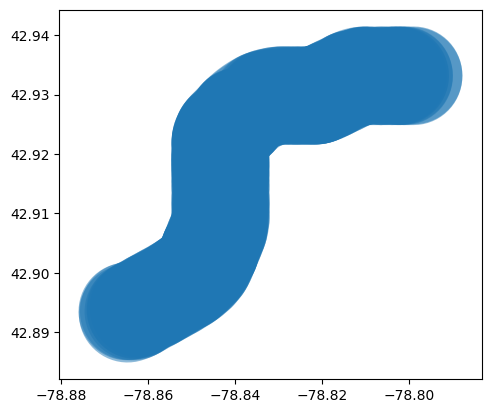

In [257]:
ax=route_33.buffered.plot(alpha=.5)  # saving the first plot as an axis and setting alpha (transparency) to 0.5


# d.) Find the boundaries of each census block

In [258]:
ACS_df = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Spring 2024/DAT_512-Stat.-Approaches-to-Big-Data/Data/ACS_2017_Data_Profile_5_Year_Estimates__Erie_County_-_Census_Tract_20240318.csv')
ACS_df.head()

,GEO.display.label.Geography,GEO.id2.Id2,HC01_VC03.Estimate..HOUSEHOLDS.BY.TYPE...Total.households,HC01_VC04.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families.,HC01_VC05.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....With.own.children.of.the.householder.under.18.years,HC01_VC06.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....Married.couple.family,HC01_VC07.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....Married.couple.family...With.own.children.of.the.householder.under.18.years,HC01_VC08.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....Male.householder..no.wife.present..family,HC01_VC09.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....Male.householder..no.wife.present..family...With.own.children.of.the.householder.under.18.years,HC01_VC10.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....Female.householder..no.husband.present..family,...,HC01_VC104.Estimate..HISPANIC.OR.LATINO.AND.RACE...Total.population...Not.Hispanic.or.Latino...Some.other.race.alone,HC01_VC105.Estimate..HISPANIC.OR.LATINO.AND.RACE...Total.population...Not.Hispanic.or.Latino...Two.or.more.races,HC01_VC106.Estimate..HISPANIC.OR.LATINO.AND.RACE...Total.population...Not.Hispanic.or.Latino...Two.or.more.races...Two.races.including.Some.other.race,HC01_VC107.Estimate..HISPANIC.OR.LATINO.AND.RACE...Total.population...Not.Hispanic.or.Latino...Two.or.more.races...Two.races.excluding.Some.other.race..and.Three.or.more.races,HC01_VC109.Estimate..HISPANIC.OR.LATINO.AND.RACE...Total.housing.units,HC01_VC113.Estimate..CITIZEN..VOTING.AGE.POPULATION...Citizen..18.and.over.population,HC01_VC114.Estimate..CITIZEN..VOTING.AGE.POPULATION...Citizen..18.and.over.population...Male,HC01_VC115.Estimate..CITIZEN..VOTING.AGE.POPULATION...Citizen..18.and.over.population...Female,Location,geometry
0,"Census Tract 9900, Erie County, New York",36029990000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,POINT (-78.86383129022715 42.83370964619451),None
1,"Census Tract 72.02, Erie County, New York",36029007202,968,455,212,219,55,41,25,195,...,18,5,0,5,1048,1425,692,733,POINT (-78.89200971828663 42.888934),None
2,"Census Tract 108.05, Erie County, New York",36029010805,2144,1266,386,1041,305,101,52,124,...,0,53,0,53,2144,4085,2055,2030,POINT (-78.70926668450177 42.8726015),None
3,"Census Tract 91.04, Erie County, New York",36029009104,1704,1251,506,1054,435,102,45,95,...,16,84,0,84,1719,3284,1557,1727,POINT (-78.75412065894162 42.9853335),None
4,"Census Tract 9400, Erie County, New York",36029940000,785,460,185,202,43,64,30,194,...,28,133,0,133,926,1402,606,796,POINT (-78.96774988447652 42.5279365),None


In [259]:
ACS_df['geometry'] = geopandas.GeoSeries.from_wkt(ACS_df['Location'])

In [260]:
ACS_df=ACS_df.set_crs('epsg:4326')
ACS_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [261]:
roads['geometry'] = geopandas.GeoSeries.from_wkt(roads['the_geom'])
roads=roads.set_crs('epsg:4326')

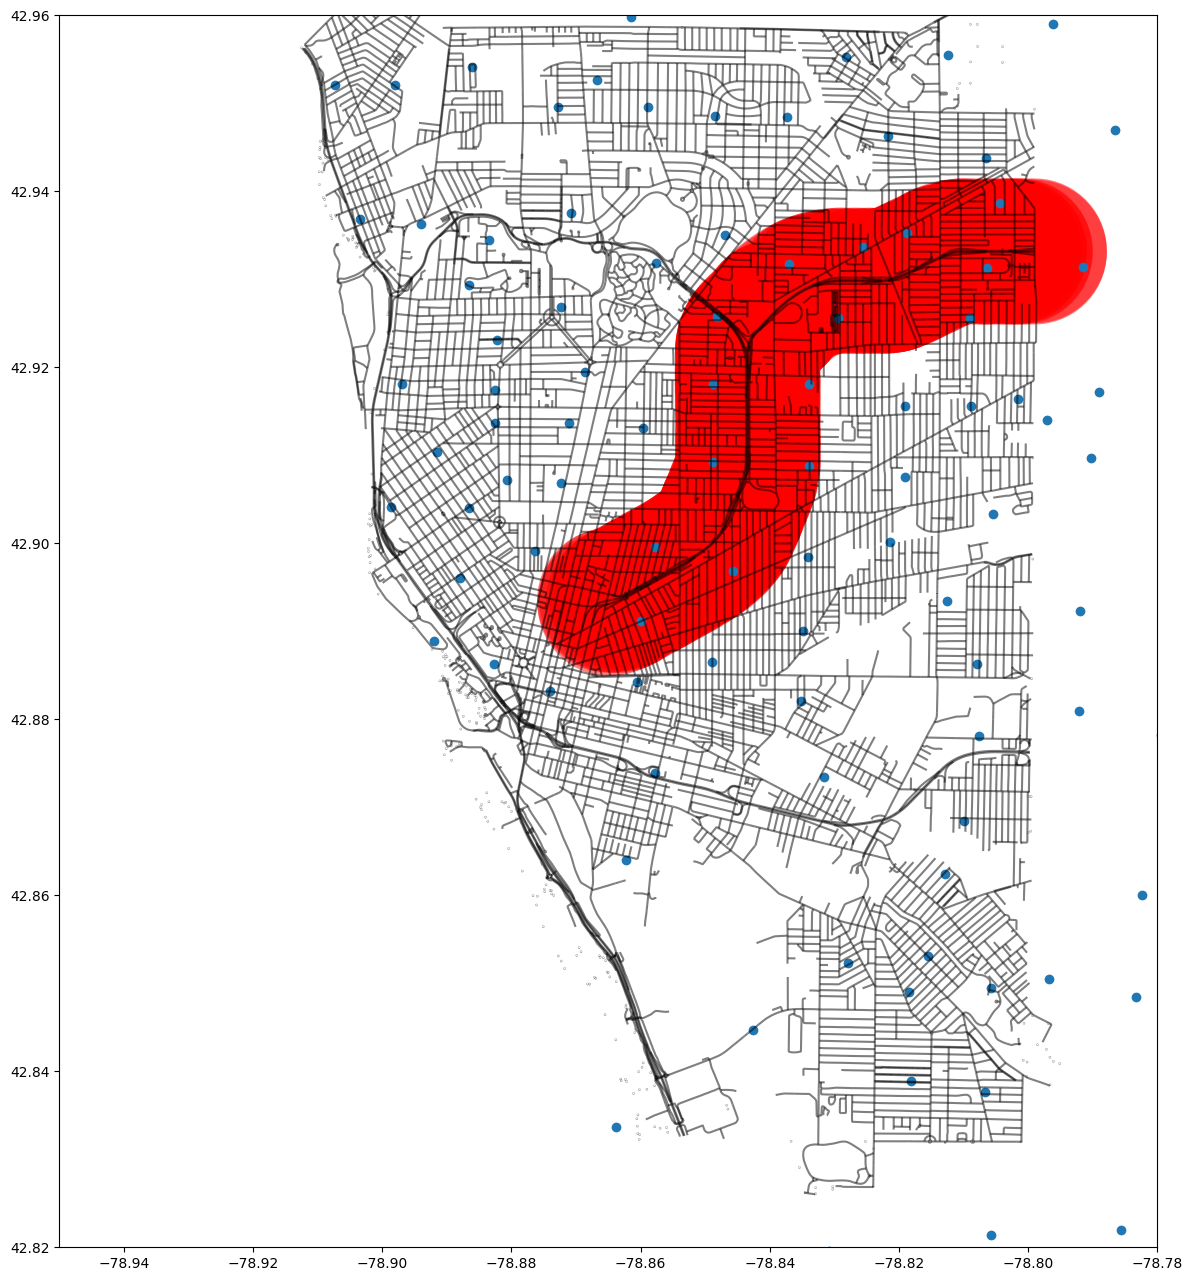

In [262]:
import matplotlib.pyplot as plt

# Plot the road network (roads), buffered Route 33, and ACS geometry
ax = roads.plot(figsize=(16, 16), alpha=0.5, color = "Black")
route_33.buffered.plot(alpha=0.5, ax=ax, color = "red" )
ACS_df.geometry.plot(ax=ax)

# Set specific limits for the plot
ax.set_xlim(-78.95, -78.78)
ax.set_ylim(42.82, 42.96)

# Show plot
plt.show()


e.) Find out which census blocks overlap with your buffer around 33

In [280]:
route_33_buffered = geopandas.GeoDataFrame(route_33, geometry='buffered')

In [283]:
blocks_intersecting_buffer = geopandas.sjoin(ACS_df, route_33_buffered, how="inner", predicate="within")

#Removing data that was already captured
blocks_intersecting_buffer = blocks_intersecting_buffer.drop_duplicates(subset='GEO.id2.Id2')
blocks_intersecting_buffer

,GEO.display.label.Geography,GEO.id2.Id2,HC01_VC03.Estimate..HOUSEHOLDS.BY.TYPE...Total.households,HC01_VC04.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families.,HC01_VC05.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....With.own.children.of.the.householder.under.18.years,HC01_VC06.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....Married.couple.family,HC01_VC07.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....Married.couple.family...With.own.children.of.the.householder.under.18.years,HC01_VC08.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....Male.householder..no.wife.present..family,HC01_VC09.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....Male.householder..no.wife.present..family...With.own.children.of.the.householder.under.18.years,HC01_VC10.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....Female.householder..no.husband.present..family,...,CompleteStreetName,HighwayNumber,Jurisdiction,FCC,ACC,SPEED,LeftPostal,RightPostal,Shape.STLength(),geometry_right
20,"Census Tract 34, Erie County, New York",36029003400,1218,689,319,210,57,60,42,419,...,State Route 33,33,01,A15,2,65,14214,14214,31.772199666332554,"MULTILINESTRING ((-78.84330 42.92224, -78.8432..."
106,"Census Tract 52.02, Erie County, New York",36029005202,926,442,184,157,24,41,19,244,...,State Route 33,33,01,A15,2,65,14214,14214,31.772199666332554,"MULTILINESTRING ((-78.84330 42.92224, -78.8432..."
114,"Census Tract 33.01, Erie County, New York",36029003301,1495,939,541,328,123,154,67,457,...,State Route 33,33,01,A15,2,65,14214,14214,31.772199666332554,"MULTILINESTRING ((-78.84330 42.92224, -78.8432..."
194,"Census Tract 33.02, Erie County, New York",36029003302,1509,637,335,203,71,94,57,340,...,State Route 33,33,01,A15,2,65,14214,14214,128.52645253036138,"MULTILINESTRING ((-78.84351 42.91619, -78.8435..."
22,"Census Tract 35, Erie County, New York",36029003500,1442,786,354,168,15,84,27,534,...,State Route 33,33,01,A15,2,65,14208,14211,268.72627932522551,"MULTILINESTRING ((-78.84350 42.91226, -78.8435..."
38,"Census Tract 39.01, Erie County, New York",36029003901,458,229,68,71,6,49,18,109,...,State Route 33,33,01,A15,2,65,14215,14215,134.14381871707522,"MULTILINESTRING ((-78.82511 42.92977, -78.8267..."
103,"Census Tract 42, Erie County, New York",36029004200,1507,877,434,311,109,105,59,461,...,State Route 33,33,01,A15,2,65,14215,14215,134.14381871707522,"MULTILINESTRING ((-78.82511 42.92977, -78.8267..."
207,"Census Tract 40.01, Erie County, New York",36029004001,1916,1087,562,274,110,155,101,658,...,State Route 33,33,01,A15,2,65,14215,14215,134.14381871707522,"MULTILINESTRING ((-78.82511 42.92977, -78.8267..."
230,"Census Tract 170, Erie County, New York",36029017000,1218,737,277,204,7,88,0,445,...,State Route 33,33,01,A15,2,65,14215,14215,134.14381871707522,"MULTILINESTRING ((-78.82511 42.92977, -78.8267..."
154,"Census Tract 44.02, Erie County, New York",36029004402,1257,769,585,58,0,104,75,607,...,State Route 33,33,01,A15,2,65,14215,14215,99.364241556033448,"MULTILINESTRING ((-78.81665 42.93148, -78.8177..."


g.) Find the median incomes for each census block.    Use an F or t-test to find out if the median income of families in census blocks touching the 33 are statistically significantly different from the median incomes of families in census blocks not touching the 33.     You will need to find a python implementation of an F test or t-test to do this.



In [289]:
# Changing from Object to Integer type
ACS_df['HC01_VC114.Estimate..INCOME.AND.BENEFITS..IN.2017.INFLATION.ADJUSTED.DOLLARS....Families...Median.family.income..dollars.'] = ACS_df['HC01_VC114.Estimate..INCOME.AND.BENEFITS..IN.2017.INFLATION.ADJUSTED.DOLLARS....Families...Median.family.income..dollars.'].astype(int)


In [291]:
import numpy as np
import scipy.stats as stats
import geopandas as gpd

# Spliting census blocks into two groups
blocks_touching_33 = ACS_df[ACS_df['GEO.id2.Id2'].isin(blocks_intersecting_buffer['GEO.id2.Id2'])]
blocks_not_touching_33 = ACS_df[~ACS_df['GEO.id2.Id2'].isin(blocks_intersecting_buffer['GEO.id2.Id2'])]

# Perform hypothesis test
t_stat, p_value = stats.ttest_ind(blocks_touching_33['HC01_VC114.Estimate..INCOME.AND.BENEFITS..IN.2017.INFLATION.ADJUSTED.DOLLARS....Families...Median.family.income..dollars.'],
                                  blocks_not_touching_33['HC01_VC114.Estimate..INCOME.AND.BENEFITS..IN.2017.INFLATION.ADJUSTED.DOLLARS....Families...Median.family.income..dollars.'],
                                  equal_var=False)
print("p-value:", p_value)

# Interpret the results based on the p-value assuming an alpha risk of 5%
if p_value < 0.05:
    print("Reject the null hypothesis: Median incomes are statistically significantly different.")
else:
    print("Fail to reject the null hypothesis: Median incomes are not statistically significantly different.")


p-value: 4.4392667827318723e-16
Reject the null hypothesis: Median incomes are statistically significantly different.
